In [1]:
from veech import *

In [2]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# # # # # # #                                         # # # # # # #
# # # # # # #             Dimple Surface              # # # # # # # 
# # # # # # #                                         # # # # # # #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

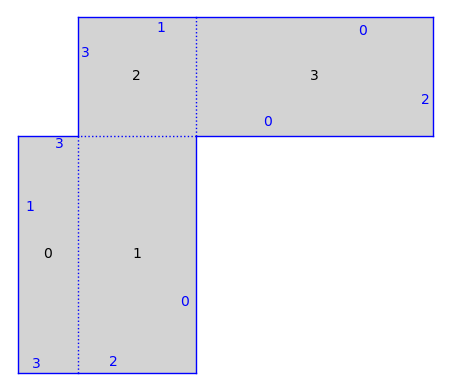

In [17]:
def define_dimple(x,y):

    def rectangle(a,b):
        return polygons(vertices = [(0,0),(a,0),(a,b),(0,b)])

    P1 = rectangle(x,y)
    Q1 = rectangle(1,y)
    R1 = rectangle(1,1)
    S1 = rectangle(y,1)
    
    s = Surface_list(QQ)

    s.add_polygon(P1)
    s.add_polygon(Q1)
    s.add_polygon(R1)
    s.add_polygon(S1)

    S = SimilaritySurface(s)

    s.set_edge_pairing(0,0,3,2)
    s.set_edge_pairing(0,1,1,3)
    s.set_edge_pairing(0,2,3,0)
    s.set_edge_pairing(0,3,1,1)
    s.set_edge_pairing(1,0,2,2)
    s.set_edge_pairing(1,2,2,0)
    s.set_edge_pairing(2,1,3,3)
    s.set_edge_pairing(2,3,3,1)

    gs = S.graphical_surface()

    gs.make_adjacent(1,2)
    gs.make_adjacent(2,1)    
    
    DS = S.minimal_cover(cover_type='dilation').copy(relabel=True)
    
    return DS, S, gs, s

DS, S, gs, s = define_dimple(1/2,2)
gs.plot()


# We first imagined the Dimple surface as a (1 by 1) square torus surface
# with an (x by x) square cut out, and replaced by a (1 by y) rectangle.
# 
# Then, we chose a presentation with the cut-out in the lower-left corner.
# 
# The simplest presentation might be the following reparameterization:
# Normalize Box 2 to be a unit square, and let x and y vary as the height and width of Box 0, respecetively.

In [75]:
def search_dimple(x,y,iters=100):
    DS, S, gs, s = define_dimple(x,y)
    print('x,y = ' + str(x) + ', ' + str(y))
    IDC1 = IDC(DS, iters, veech = 1, show_current_sym = 1) # Change 1 to > 100
    show(IDC1.plot(model = 'UHP', figsize = 10)) #UHP or KM
    gs.plot()
    show(list(IDC1.generators(normalize_det=1)))
    
# Using FlatSurf, we are searching for Veech elements under certain simple parameters.
# Under the number of iterations we've tried, Flatsurf doesn't terminate for any of the following,
# it just keeps finding more and more veech elements.

In [5]:
# search_dimple(1,1) This is the square torus.
search_dimple(1/2,1)
search_dimple(1/3,1)
search_dimple(1/4,1)

x,y = 1/2, 1



/private/var/tmp/sage-9.6-current/local/var/lib/sage/venv-python3.10.3/lib/python3.10/site-packages/sage/rings/qqbar.py:2865: DeprecationWarning: non-integer arguments to randrange() have been deprecated since Python 3.10 and will be removed in a subsequent version
  roots = p.roots(ring, False)


IDR 100/100 --> 10.11 seconds


[
[1 0]  [-1  0]
[6 1], [ 0 -1]
]

x,y = 1/3, 1

IDR 100/100 --> 11.83 seconds


[
[ 1  0]  [-1  4]  [1 0]  [-1  0]
[-4  1], [ 0 -1], [4 1], [ 0 -1]
]

x,y = 1/4, 1

IDR 100/100 --> 12.51 seconds


[
[-1  0]
[ 0 -1]
]

In [73]:
search_dimple(1/3,1,1000)

x,y = 1/3, 1



[ 3  0]
[12  3]

[  3   0]
[-12   3]

[-1  4]
[ 0 -1]

[-3 12]
[ 0 -3]

[ 1  0]
[-4  1]

[-49/3 200/9]
[   12 -49/3]

[   -49 -200/3]
[   -36    -49]

[ -49/3 -388/9]
[    12   95/3]

[-47 -24]
[-92 -47]

KeyboardInterrupt: 

x,y = 1, 1



[-1  0]
[-1 -1]

[ 0  1]
[-1  0]

[ 0 -1]
[ 1  2]

IDR 4/100 --> 0.7 seconds
Veech terminated


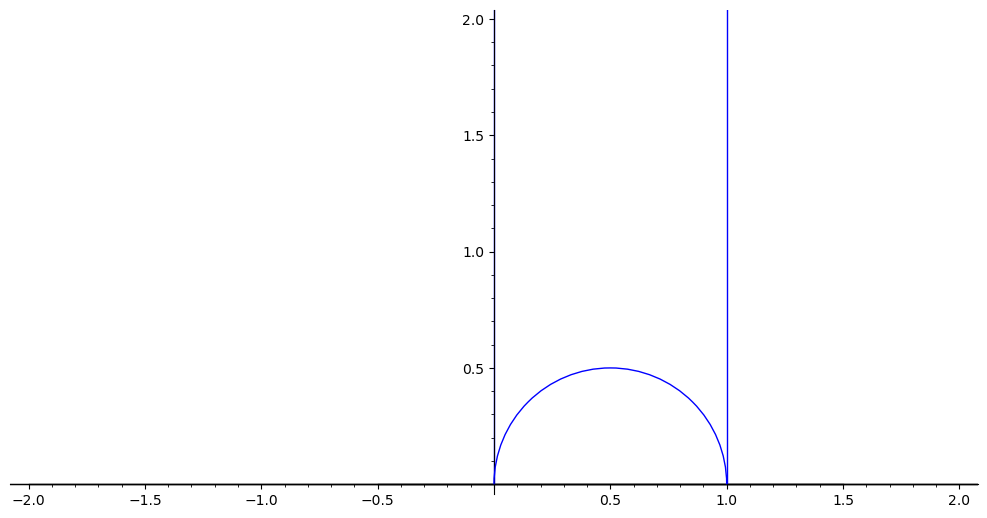

[
[ 0 -1]  [ 0  1]  [-1  0]  [-1  0]
[ 1  2], [-1  0], [ 0 -1], [-1 -1]
]

In [76]:
search_dimple(1,1)

In [6]:
# The horizontal left-right sheers are generated by    [[1,z],    where  z = lcm( (x + 1)/y, y + 1).
#                                                       [0,1]]
#                                                               
# 
# The vertical up-down sheers are generated by         [[1, 0],   where z' = lcm(1/(y+1), xy/(y^2 + x)).
#                                                       [z',1]]
#                                                               
# 
# This is because the surface decomposes into horizontal cylinders of moduli (x + 1)/y and y + 1,
# and it decomposes into vertical cylinders of moduli 1/(y+1) and xy/(y^2 + x).
# 
# These formulas match the results produced above,
# namely, the entries 6, 4, and 10 in the first matrices of the above three groups.

traj1 is a saddle connection.
traj2 is a saddle connection.


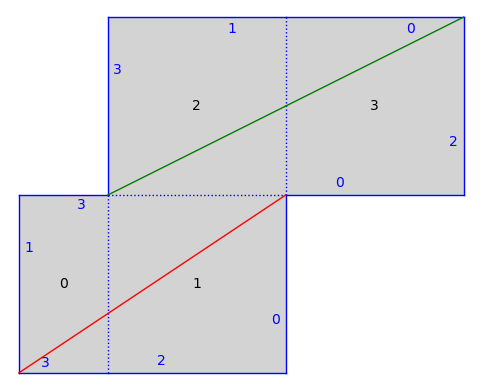

In [7]:
x,y = 1/2,1
v = S.tangent_vector(0, (0,0), (x + 1, y))
w = S.tangent_vector(2, (0,0), (y+1, 1 ))
traj1 = v.straight_line_trajectory()
traj2 = w.straight_line_trajectory()
traj1.flow(100)
traj2.flow(100)
print('traj1 is' + 'not'*(not traj1.is_saddle_connection()) + ' a saddle connection.')
print('traj2 is' + 'not'*(not traj2.is_saddle_connection()) + ' a saddle connection.')
S.plot() + traj1.plot(color='red') + traj2.plot(color='green')

In [8]:
# What to make of all the non-integer results? (i.e. the non-triangular matrices?)
# Are they products of these horizontal and vertical sheers?
# Or are they something else entirely?

In [9]:
DS, S, gs, s = define_dimple(1/2,1)

In [10]:
A = matrix([[14, 39],
            [5, 14]])

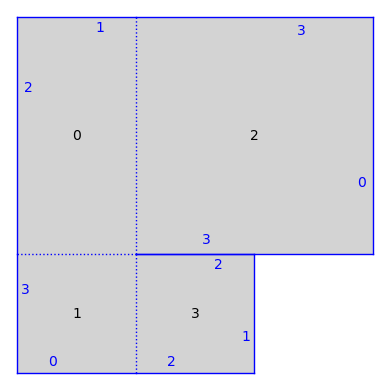

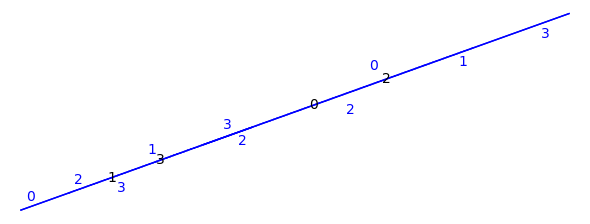

In [11]:
show(DS.plot())
show((A*DS).plot())

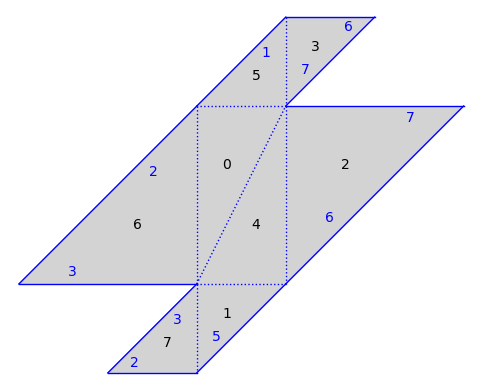

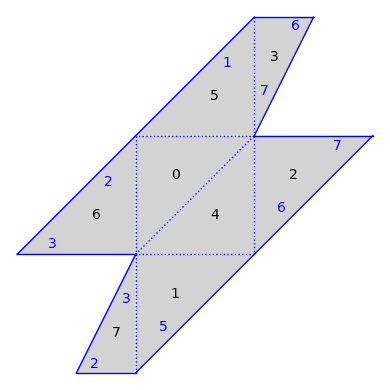

In [12]:
show((DS).delaunay_triangulation().plot())
show((A*DS).delaunay_triangulation().plot())

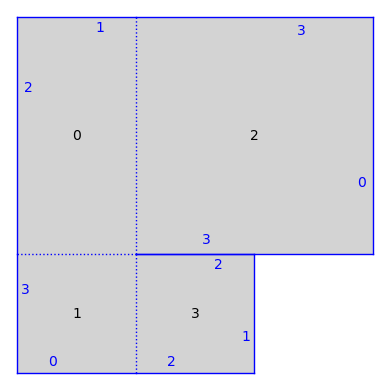

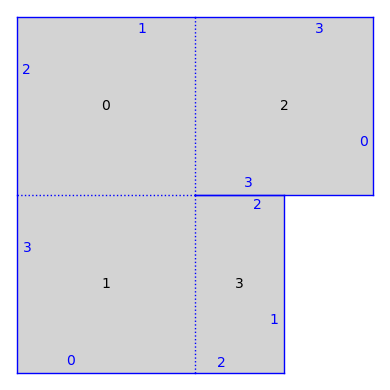

In [13]:
show(DS.delaunay_decomposition().plot())
show((A*DS).delaunay_decomposition().plot())

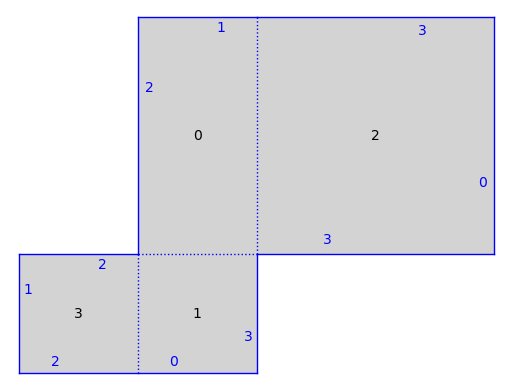

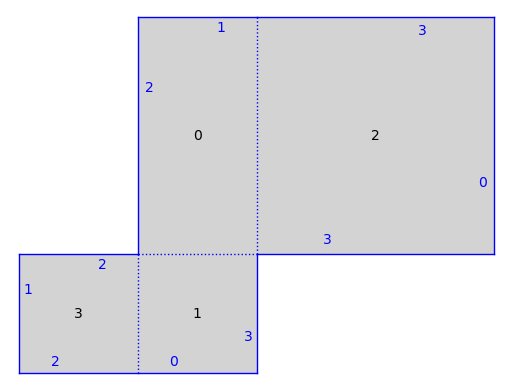

In [14]:
show(DS.canonicalize().plot())
show((A*DS).canonicalize().plot())

In [15]:
print((A*DS).delaunay_triangulation() == DS.delaunay_triangulation())
print((A*DS).delaunay_decomposition() == DS.delaunay_decomposition())
print(DS.canonicalize() == (A*DS).canonicalize())

False
False
True


closed: False
saddle: False


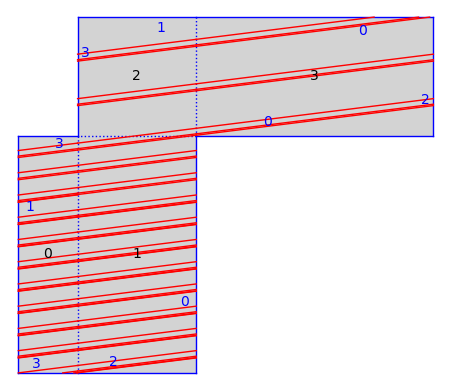

In [31]:
v = S.tangent_vector(0, (0,0), (8,1))
traj = v.straight_line_trajectory()
traj.flow(100)
print('closed: ' + str(traj.is_closed()))
print('saddle: ' + str(traj.is_saddle_connection()))
S.plot() + traj.plot(color='red')

In [65]:
# s = translation_surfaces.square_torus()
v = S.tangent_vector(0,(1/3,0),(1,-2/3))
traj = v.straight_line_trajectory()
traj.flow(4000)
traj.is_closed()

cyl = traj.cylinder()
# cyl.area()
cyl.circumference()
print(cyl.circumference())
# modulus = cyl.circumference() / (cyl.area() / cyl.circumference())
# print(modulus)
# a + 1
# sage: cyl.holonomy()
# (3*a + 4, 2*a + 3)
# sage: cyl.edges()
# (2, 3, 3, 2, 4)

AssertionError: Circumference only makes sense for cone surfaces.

In [69]:
cyl.polygons()

((3, Polygon: (3/2, 1), (1/2, 1), (2, 0), (2, 2/3)),
 (2, Polygon: (0, 2/3), (0, 0), (1, 0)),
 (1, Polygon: (1, 2), (0, 2), (1, 4/3)),
 (0, Polygon: (0, 2), (0, 4/3), (1/2, 1), (1/2, 5/3)),
 (1, Polygon: (0, 5/3), (0, 1), (1, 1/3), (1, 1)),
 (0, Polygon: (0, 1), (0, 1/3), (1/2, 0), (1/2, 2/3)),
 (1, Polygon: (0, 2/3), (0, 0), (1, 0)),
 (2, Polygon: (1, 1), (0, 1), (1, 1/3)),
 (3, Polygon: (0, 1), (0, 1/3), (1/2, 0), (3/2, 0)),
 (0, Polygon: (3/8, 2), (1/8, 2), (1/2, 7/4), (1/2, 23/12)),
 (1, Polygon: (0, 23/12), (0, 7/4), (1, 13/12), (1, 5/4)),
 (0, Polygon: (0, 5/4), (0, 13/12), (1/2, 3/4), (1/2, 11/12)),
 (1, Polygon: (0, 11/12), (0, 3/4), (1, 1/12), (1, 1/4)),
 (0, Polygon: (0, 1/4), (0, 1/12), (1/8, 0), (3/8, 0)))

In [57]:
cyl.circumference()

3.605551275463990?

In [58]:
b = cyl.boundary()

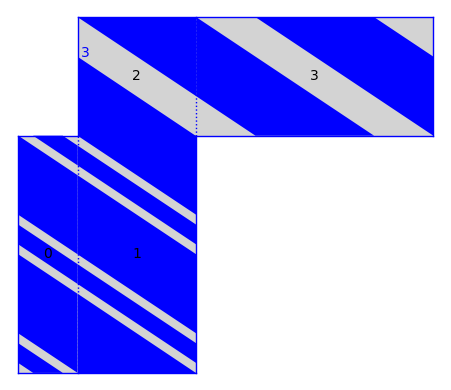

In [70]:
plt = S.plot()
# for sc in b:
S.plot() + cyl.plot()

In [37]:
m = matrix([[-29,-45],[20,31]])
m.eigenvectors_right()

[(1,
  [
  (1, -2/3)
  ],
  2)]

In [38]:
m.eigenvectors_right?